## Integrantes:
- Luis Francisco Rodriguez Acevedo

Implementar un modelo de regresión
logística “one-vs-all” para predecir la
enfermedad de las hojas de mango

# Creacion de modelo de regresion lineal

## Implementacion con una imagen

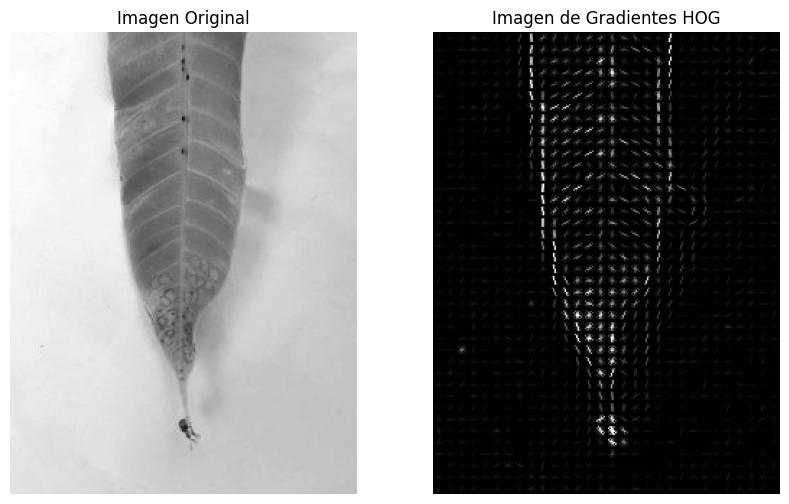

In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Cargar la imagen
ruta_imagen = '/content/drive/MyDrive/Vision_computo/Actividad/mango_leaf_disease/Anthracnose/20211008_124249 (Custom).jpg'  # Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta de tu imagen
imagen = cv2.imread(ruta_imagen)

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Calcular los descriptores HOG y la imagen de gradientes
descriptores_hog, imagen_hog = hog(imagen_gris, orientations=9, pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Ajustar la imagen de gradientes para una mejor visualización
imagen_hog = exposure.rescale_intensity(imagen_hog, in_range=(0, 10))

# Mostrar la imagen original y la imagen de gradientes HOG
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_hog, cmap='gray')
plt.title('Imagen de Gradientes HOG')
plt.axis('off')

plt.show()

In [ ]:
print(descriptores_hog)

largo_descriptores_hog = len(descriptores_hog)
print("El largo de descriptores_hog es:", largo_descriptores_hog)


[0.32473736 0.         0.03654506 ... 0.16311727 0.         0.        ]
El largo de descriptores_hog es: 40716


## Preprocesamiento

In [ ]:
import os

def count_images_in_folder(folder_path):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        # Obtener la lista de archivos en la subcarpeta
        files = os.listdir(subfolder)

        # Contar el número de archivos que tienen la extensión de imagen
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))

        # Imprimir el nombre de la subcarpeta y el número de imágenes en esa carpeta
        subfolder_name = os.path.basename(subfolder)
        print(f"En la carpeta '{subfolder_name}' hay {image_count} imágenes.")

# Llamar a la función para contar imágenes en la carpeta principal
folder_path = '/content/drive/MyDrive/Vision_computo/Actividad/mango_leaf_disease'
count_images_in_folder(folder_path)



En la carpeta 'Anthracnose' hay 500 imágenes.
En la carpeta 'Bacterial Canker' hay 500 imágenes.
En la carpeta 'Cutting Weevil' hay 500 imágenes.
En la carpeta 'Die Back' hay 500 imágenes.
En la carpeta 'Gall Midge' hay 500 imágenes.
En la carpeta 'Healthy' hay 500 imágenes.
En la carpeta 'Sooty Mould' hay 500 imágenes.
En la carpeta 'Powdery Mildew' hay 500 imágenes.
En la carpeta '.ipynb_checkpoints' hay 0 imágenes.


In [ ]:
import os
import cv2

def get_image_dimensions(image_path):
    # Leer la imagen usando OpenCV
    image = cv2.imread(image_path)
    if image is not None:
        # Obtener las dimensiones de la imagen
        height, width, channels = image.shape
        return min(height, width)  # Devolver la dimensión más pequeña
    else:
        return None

def count_images_in_folder(folder_path):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        # Obtener la lista de archivos en la subcarpeta
        files = [f.path for f in os.scandir(subfolder) if f.is_file()]

        # Inicializar la dimensión más pequeña
        smallest_dimension = float('inf')

        # Recorrer los archivos para obtener la dimensión más pequeña de las imágenes
        for file in files:
            image_dimension = get_image_dimensions(file)
            if image_dimension is not None:
                smallest_dimension = min(smallest_dimension, image_dimension)

        # Imprimir el nombre de la subcarpeta y la dimensión más pequeña de las imágenes en esa carpeta
        subfolder_name = os.path.basename(subfolder)
        print(f"En la carpeta '{subfolder_name}' la dimensión más pequeña de las imágenes es: {smallest_dimension}")

# Llamar a la función para obtener las dimensiones de las imágenes en la carpeta principal
folder_path = '/content/drive/MyDrive/Vision_computo/Actividad/mango_leaf_disease/'
count_images_in_folder(folder_path)


En la carpeta 'Anthracnose' la dimensión más pequeña de las imágenes es: 86
En la carpeta 'Bacterial Canker' la dimensión más pequeña de las imágenes es: 240
En la carpeta 'Cutting Weevil' la dimensión más pequeña de las imágenes es: 240
En la carpeta 'Die Back' la dimensión más pequeña de las imágenes es: 240
En la carpeta 'Gall Midge' la dimensión más pequeña de las imágenes es: 70
En la carpeta 'Healthy' la dimensión más pequeña de las imágenes es: 160
En la carpeta 'Sooty Mould' la dimensión más pequeña de las imágenes es: 240
En la carpeta 'Powdery Mildew' la dimensión más pequeña de las imágenes es: 175


### Redimensionar las imagenes

In [ ]:
import os
import cv2

def resize_images_in_folders(root_folder, target_width, target_height, output_folder):
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Recorrer todas las carpetas dentro de la carpeta raíz
    for root, folders, _ in os.walk(root_folder):
        # Recorrer todas las carpetas
        for folder in folders:
            folder_path = os.path.join(root, folder)
            # Recorrer todas las imágenes dentro de la carpeta
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                # Leer la imagen usando OpenCV
                image = cv2.imread(file_path)
                # Verificar si la imagen se pudo leer correctamente
                if image is not None:
                    # Redimensionar la imagen
                    resized_image = cv2.resize(image, (target_width, target_height))
                    # Guardar la imagen redimensionada en la carpeta de salida
                    output_path = os.path.join(output_folder, folder, file)
                    if not os.path.exists(os.path.join(output_folder, folder)):
                        os.makedirs(os.path.join(output_folder, folder))
                    cv2.imwrite(output_path, resized_image)
                else:
                    print(f"No se pudo leer la imagen: {file_path}")

# Definir las dimensiones de destino
target_width = 240
target_height = 320

# Ruta de la carpeta raíz que contiene las subcarpetas con las imágenes
root_folder = '/content/drive/MyDrive/Vision_computo/Actividad/mango_leaf_disease'  # Reemplazar '/ruta/a/la/carpeta/raiz' con la ruta de tu carpeta raíz

# Ruta de la carpeta donde se guardarán las imágenes redimensionadas
output_folder = '/content/drive/MyDrive/Vision_computo/Actividad/Mango'  # Reemplazar '/ruta/a/la/carpeta/destino' con la ruta de tu carpeta de destino

# Redimensionar las imágenes y guardarlas en la carpeta de destino
resize_images_in_folders(root_folder, target_width, target_height, output_folder)



### Separa unas imagenes para pasarle al modelo

In [ ]:
import os

def count_images_in_folder(folder_path):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        # Obtener la lista de archivos en la subcarpeta
        files = os.listdir(subfolder)

        # Contar el número de archivos que tienen la extensión de imagen
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))

        # Imprimir el nombre de la subcarpeta y el número de imágenes en esa carpeta
        subfolder_name = os.path.basename(subfolder)
        print(f"En la carpeta '{subfolder_name}' hay {image_count} imágenes.")

# Llamar a la función para contar imágenes en la carpeta principal
folder_path = '/content/drive/MyDrive/Vision_computo/Actividad/Mango2'
count_images_in_folder(folder_path)


En la carpeta 'Anthracnose' hay 4 imágenes.
En la carpeta 'Bacterial Canker' hay 4 imágenes.
En la carpeta 'Cutting Weevil' hay 4 imágenes.
En la carpeta 'Die Back' hay 4 imágenes.
En la carpeta 'Gall Midge' hay 4 imágenes.
En la carpeta 'Healthy' hay 4 imágenes.
En la carpeta 'Sooty Mould' hay 4 imágenes.
En la carpeta 'Powdery Mildew' hay 4 imágenes.


In [ ]:
import os
import shutil
import random

def move_random_images(folder_path, destination_folder, percentage=5):
    # Obtener todas las subcarpetas dentro de la carpeta principal
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    # Recorrer cada subcarpeta
    for subfolder in subfolders:
        # Obtener la lista de archivos en la subcarpeta
        files = [file for file in os.listdir(subfolder) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        # Calcular el número de imágenes a mover
        num_images_to_move = max(1, int(len(files) * (percentage / 100)))

        # Seleccionar aleatoriamente las imágenes a mover
        images_to_move = random.sample(files, num_images_to_move)

        # Crear la carpeta de destino si no existe
        destination_subfolder = os.path.join(destination_folder, os.path.basename(subfolder))
        os.makedirs(destination_subfolder, exist_ok=True)

        # Mover las imágenes seleccionadas a la carpeta de destino
        for image_name in images_to_move:
            source_path = os.path.join(subfolder, image_name)
            destination_path = os.path.join(destination_subfolder, image_name)
            shutil.move(source_path, destination_path)

        print(f"Se movieron {num_images_to_move} imágenes de la carpeta '{os.path.basename(subfolder)}' a '{destination_subfolder}'.")

# Llamar a la función para mover el 5% de las imágenes de cada subcarpeta a otra ubicación
folder_path = '/content/drive/MyDrive/Vision_computo/Actividad/Mango'
destination_folder = '/content/drive/MyDrive/Vision_computo/Actividad/Mango2'
percentage_to_move = 1
move_random_images(folder_path, destination_folder, percentage_to_move)



Se movieron 4 imágenes de la carpeta 'Anthracnose' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Anthracnose'.
Se movieron 4 imágenes de la carpeta 'Bacterial Canker' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Bacterial Canker'.
Se movieron 4 imágenes de la carpeta 'Cutting Weevil' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Cutting Weevil'.
Se movieron 4 imágenes de la carpeta 'Die Back' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Die Back'.
Se movieron 4 imágenes de la carpeta 'Gall Midge' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Gall Midge'.
Se movieron 4 imágenes de la carpeta 'Healthy' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Healthy'.
Se movieron 4 imágenes de la carpeta 'Sooty Mould' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Sooty Mould'.
Se movieron 4 imágenes de la carpeta 'Powdery Mildew' a '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Powdery Mildew'.


## Procesamiento

### Calcular los descriptores HOG para cada imagen

In [ ]:
import cv2
from skimage.feature import hog
import os

# Función para calcular los descriptores HOG de una imagen
def calcular_descriptores_hog(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    descriptores_hog = hog(imagen_gris, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys')
    return descriptores_hog

# Ruta de la carpeta principal que contiene las subcarpetas con imágenes
ruta_carpeta_principal = '/content/drive/MyDrive/Vision_computo/Actividad/Mango/'  # Reemplaza 'ruta/a/tu/carpeta_principal/' con la ruta de tu carpeta principal

# Diccionario para almacenar los descriptores HOG agrupados por el nombre de las carpetas
hog_descriptors_por_carpeta = {}

# Recorrer todas las carpetas y subcarpetas en la carpeta principal
for directorio_raiz, directorios, archivos in os.walk(ruta_carpeta_principal):
    # Recorrer cada archivo en la carpeta actual
    for nombre_archivo in archivos:
        # Combinar la ruta completa del archivo
        ruta_imagen = os.path.join(directorio_raiz, nombre_archivo)

        # Leer la imagen
        imagen = cv2.imread(ruta_imagen)

        # Calcular los descriptores HOG
        descriptores_hog = calcular_descriptores_hog(imagen)

        # Obtener el nombre de la carpeta actual
        nombre_carpeta = os.path.basename(directorio_raiz)

        # Agregar los descriptores HOG al diccionario agrupados por el nombre de la carpeta
        if nombre_carpeta not in hog_descriptors_por_carpeta:
            hog_descriptors_por_carpeta[nombre_carpeta] = []
        hog_descriptors_por_carpeta[nombre_carpeta].append(descriptores_hog)

# Mostrar los descriptores HOG por cada carpeta
for nombre_carpeta, descriptores_hog_lista in hog_descriptors_por_carpeta.items():
    print(f"Nombre de la carpeta: {nombre_carpeta}")
    for idx, descriptores_hog in enumerate(descriptores_hog_lista):
        print(f"   Descriptores HOG de la imagen {idx + 1}: {descriptores_hog}")

### Creacion de diccionario

In [ ]:
print(hog_descriptors_por_carpeta)

In [ ]:
import pickle

def guardar_diccionario(diccionario, nombre_archivo):
    with open(nombre_archivo, 'wb') as archivo:
        pickle.dump(diccionario, archivo)
    print(f"Diccionario guardado como '{nombre_archivo}'.")

def cargar_diccionario(nombre_archivo):
    with open(nombre_archivo, 'rb') as archivo:
        diccionario = pickle.load(archivo)
    return diccionario

# Supongamos que tienes un diccionario llamado 'mi_diccionario'
mi_diccionario = hog_descriptors_por_carpeta

# Guardar el diccionario en un archivo
nombre_archivo = 'mi_diccionario.pkl'
guardar_diccionario(mi_diccionario, nombre_archivo)

In [ ]:
import pickle
def cargar_diccionario(nombre_archivo):
    with open(nombre_archivo, 'rb') as archivo:
        diccionario = pickle.load(archivo)
    return diccionario
# Cargar el diccionario desde el archivo
nombre_archivo = 'mi_diccionario.pkl'
hog_descriptors_por_carpeta = cargar_diccionario(nombre_archivo)
print("Diccionario cargado desde el archivo:", hog_descriptors_por_carpeta)

## 1. Primer Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Preparar los datos para el entrenamiento
X = []
Y = []

for etiqueta, caracteristicas in hog_descriptors_por_carpeta.items():
    X.extend(caracteristicas)
    Y.extend([etiqueta] * len(caracteristicas))

X = np.array(X)
Y = np.array(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

# Evaluar el modelo
precision_train = modelo.score(X_train, Y_train)
precision_test = modelo.score(X_test, Y_test)

print("Precisión en conjunto de entrenamiento:", precision_train)
print("Precisión en conjunto de prueba:", precision_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión en conjunto de entrenamiento: 1.0
Precisión en conjunto de prueba: 0.7825


### 2 Segundo modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import warnings

# Supongamos que tienes un diccionario donde las claves son las etiquetas Y y los valores son las características X
# Preparar los datos para el entrenamiento
X = []
Y = []

for etiqueta, caracteristicas in hog_descriptors_por_carpeta.items():
    X.extend(caracteristicas)
    Y.extend([etiqueta] * len(caracteristicas))

X = np.array(X)
Y = np.array(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) # 5

# Inicializar y entrenar el modelo de regresión logística (one-vs-all)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    modelo_one_vs_all = LogisticRegression(solver='saga', max_iter=2, multi_class='ovr')
    modelo_one_vs_all.fit(X_train, Y_train)

# Evaluar el modelo (one-vs-all)
precision_train_one_vs_all = modelo_one_vs_all.score(X_train, Y_train)
precision_test_one_vs_all = modelo_one_vs_all.score(X_test, Y_test)

print("Precisión en conjunto de entrenamiento (one-vs-all):", precision_train_one_vs_all)
print("Precisión en conjunto de prueba (one-vs-all):", precision_test_one_vs_all)


Precisión en conjunto de entrenamiento (one-vs-all): 0.864417568427753
Precisión en conjunto de prueba (one-vs-all): 0.7150127226463104


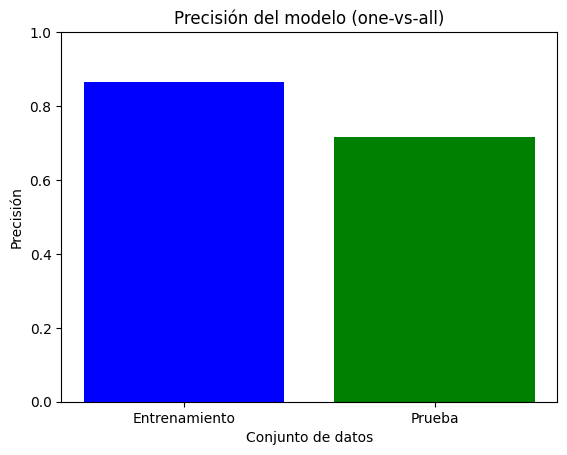

In [ ]:
import matplotlib.pyplot as plt

# Crear una lista de nombres para las etiquetas
labels = ['Entrenamiento', 'Prueba']

# Crear una lista de las puntuaciones de precisión
scores = [precision_train_one_vs_all, precision_test_one_vs_all]

# Graficar las puntuaciones
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Conjunto de datos')
plt.ylabel('Precisión')
plt.title('Precisión del modelo (one-vs-all)')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1 para la precisión
plt.show()


## 3 modelo

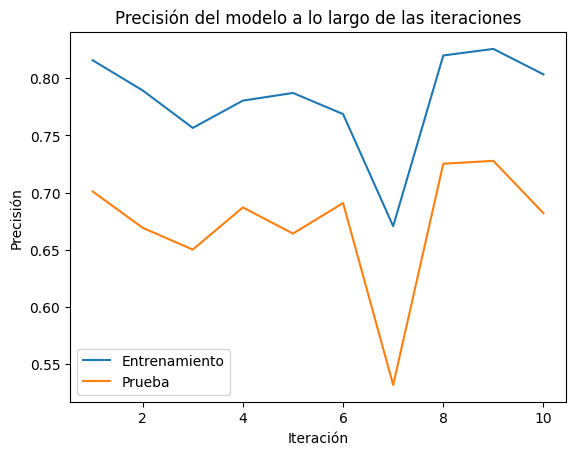

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import warnings

# Supongamos que tienes un diccionario donde las claves son las etiquetas Y y los valores son las características X
# Preparar los datos para el entrenamiento
X = []
Y = []

for etiqueta, caracteristicas in hog_descriptors_por_carpeta.items():
    X.extend(caracteristicas)
    Y.extend([etiqueta] * len(caracteristicas))

X = np.array(X)
Y = np.array(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) # 5

# Inicializar y entrenar el modelo de regresión logística (one-vs-all)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    modelo_one_vs_all = LogisticRegression(solver='saga', max_iter=1, multi_class='ovr')

    # Lista para almacenar la precisión en cada iteración
    precision_train_iter = []
    precision_test_iter = []

    # Entrenar el modelo y registrar la precisión en cada iteración
    for i in range(10):  # Supongamos que entrenamos durante 50 iteraciones
        modelo_one_vs_all.fit(X_train, Y_train)

        # Evaluar el modelo en el conjunto de entrenamiento
        precision_train = modelo_one_vs_all.score(X_train, Y_train)
        precision_train_iter.append(precision_train)

        # Evaluar el modelo en el conjunto de prueba
        precision_test = modelo_one_vs_all.score(X_test, Y_test)
        precision_test_iter.append(precision_test)

# Graficar la precisión en cada iteración
plt.plot(range(1, len(precision_train_iter) + 1), precision_train_iter, label='Entrenamiento')
plt.plot(range(1, len(precision_test_iter) + 1), precision_test_iter, label='Prueba')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.title('Precisión del modelo a lo largo de las iteraciones')
plt.legend()
plt.show()



## Guardar el modelo

In [ ]:
import joblib

# Guardar el modelo en un archivo
nombre_archivo_modelo = 'modelo_regresion_logistica.pkl'
joblib.dump(modelo, nombre_archivo_modelo)
print(f"Modelo guardado como '{nombre_archivo_modelo}'")


Modelo guardado como 'modelo_regresion_logistica.pkl'


### Probar el modelo

La clase predicha para la imagen de prueba es: ['Anthracnose']


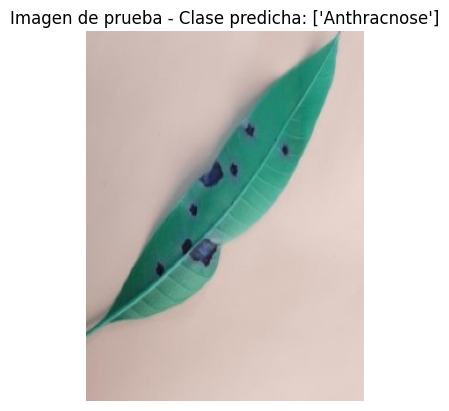

Precisión del modelo: 0.787531806615776


In [ ]:
# Cargar el modelo guardado
modelo_cargado = joblib.load(nombre_archivo_modelo)

# Cargar la nueva imagen
ruta_imagen_nueva = '/content/drive/MyDrive/Vision_computo/Actividad/Mango2/Anthracnose/20211011_134021 (Custom).jpg'
imagen_nueva = cv2.imread(ruta_imagen_nueva)

# Calcular los descriptores HOG de la imagen de prueba
descriptores_prueba = calcular_descriptores_hog(imagen_nueva)

# Convertir los descriptores a un array de 1D (requerido para predecir con el modelo)
descriptores_prueba = descriptores_prueba.reshape(1, -1)

# Predecir la clase de la imagen de prueba utilizando el modelo cargado
clase_predicha = modelo_cargado.predict(descriptores_prueba)

print(f"La clase predicha para la imagen de prueba es: {clase_predicha}")

# Mostrar la imagen
import matplotlib.pyplot as plt

plt.imshow(imagen_nueva)
plt.title(f"Imagen de prueba - Clase predicha: {clase_predicha}")
plt.axis('off')
plt.show()

# Imprimir la precisión del modelo
print("Precisión del modelo:", precision_test)